In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from dbds import generate_hotel_dfs
from agg import prep_demand_features
from agg_utils import stly_cols_agg, ly_cols_agg, stly_pace_cols, ty_pace_cols

pd.options.display.max_rows = 150
pd.options.display.max_columns = 250
pd.options.display.max_colwidth = None

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")

In [2]:
%%time
h1_stats = prep_demand_features(1)

CPU times: user 1min, sys: 307 ms, total: 1min 1s
Wall time: 1min 9s


In [3]:
# # convert month with cosine/sine func to make cyclical
# h1_stats["month_norm"] = 3 * np.pi * h1_stats["MonthNum"] / h1_stats["MonthNum"].max()
# h1_stats["cos_month"] = np.cos(h1_stats["month_norm"])
# df["sin_x"] = np.sin(df["x_norm"])

In [4]:
[col for col in h1_stats.columns]

['id',
 'DOW',
 'RoomsOTB',
 'RevOTB',
 'CxlForecast',
 'TRN_RoomsOTB',
 'TRN_RevOTB',
 'TRN_CxlForecast',
 'TRNP_RoomsOTB',
 'GRP_RoomsOTB',
 'CNT_RoomsOTB',
 'StayDate',
 'STLY_StayDate',
 'DaysUntilArrival',
 'Realized_Cxls',
 'SellingPrice',
 'TM30_RoomsOTB',
 'TM30_RevOTB',
 'TM30_TRN_RoomsOTB',
 'TM30_TRN_RevOTB',
 'TM15_RoomsOTB',
 'TM15_RevOTB',
 'TM15_TRN_RoomsOTB',
 'TM15_TRN_RevOTB',
 'TM05_RoomsOTB',
 'TM05_RevOTB',
 'TM05_TRN_RoomsOTB',
 'TM05_TRN_RevOTB',
 'AsOfDate',
 'STLY_AsOfDate',
 'RemSupply',
 'ADR_OTB',
 'TRN_ADR_OTB',
 'LYA_RoomsSold',
 'LYA_ADR',
 'LYA_RoomRev',
 'LYA_NumCancels',
 'LYA_TRN_RoomsSold',
 'LYA_TRN_ADR',
 'LYA_TRN_RoomRev',
 'ACTUAL_RoomsSold',
 'ACTUAL_ADR',
 'ACTUAL_RoomRev',
 'ACTUAL_TRN_RoomsSold',
 'ACTUAL_TRN_ADR',
 'ACTUAL_TRN_RoomRev',
 'ACTUAL_NumCancels',
 'ACTUAL_RoomsPickup',
 'ACTUAL_ADR_Pickup',
 'ACTUAL_RevPickup',
 'ACTUAL_TRN_RoomsPickup',
 'ACTUAL_TRN_ADR_Pickup',
 'ACTUAL_TRN_RevPickup',
 'MonthNum',
 'DayOfWeek',
 'Mon',
 'Sat',

In [5]:
h1_stats.head()

,id,DOW,RoomsOTB,RevOTB,CxlForecast,TRN_RoomsOTB,TRN_RevOTB,TRN_CxlForecast,TRNP_RoomsOTB,GRP_RoomsOTB,CNT_RoomsOTB,StayDate,STLY_StayDate,DaysUntilArrival,Realized_Cxls,SellingPrice,TM30_RoomsOTB,TM30_RevOTB,TM30_TRN_RoomsOTB,TM30_TRN_RevOTB,TM15_RoomsOTB,TM15_RevOTB,TM15_TRN_RoomsOTB,TM15_TRN_RevOTB,TM05_RoomsOTB,TM05_RevOTB,TM05_TRN_RoomsOTB,TM05_TRN_RevOTB,AsOfDate,STLY_AsOfDate,RemSupply,ADR_OTB,TRN_ADR_OTB,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_NumCancels,LYA_TRN_RoomsSold,LYA_TRN_ADR,LYA_TRN_RoomRev,ACTUAL_RoomsSold,ACTUAL_ADR,ACTUAL_RoomRev,ACTUAL_TRN_RoomsSold,ACTUAL_TRN_ADR,ACTUAL_TRN_RoomRev,ACTUAL_NumCancels,ACTUAL_RoomsPickup,ACTUAL_ADR_Pickup,ACTUAL_RevPickup,ACTUAL_TRN_RoomsPickup,ACTUAL_TRN_ADR_Pickup,ACTUAL_TRN_RevPickup,MonthNum,DayOfWeek,Mon,Sat,Sun,Thu,Tue,Wed,WE,week_of_year,TM30_ADR_OTB,TM30_RoomsPickup,TM30_RevPickup,TM30_ADR_Pickup,TM30_TRN_ADR_OTB,TM30_TRN_RoomsPickup,TM30_TRN_RevPickup,TM30_TRN_ADR_Pickup,TM15_ADR_OTB,TM15_RoomsPickup,TM15_RevPickup,TM15_ADR_Pickup,TM15_TRN_ADR_OTB,TM15_TRN_RoomsPickup,TM15_TRN_RevPickup,TM15_TRN_ADR_Pickup,TM05_ADR_OTB,TM05_RoomsPickup,TM05_RevPickup,TM05_ADR_Pickup,TM05_TRN_ADR_OTB,TM05_TRN_RoomsPickup,TM05_TRN_RevPickup,TM05_TRN_ADR_Pickup,OTB_GapToLYA_RoomsSold,OTB_GapToLYA_ADR,OTB_GapToLYA_RoomRev,OTB_GapToLYA_NumCancels,OTB_GapToLYA_TRN_RoomsSold,OTB_GapToLYA_TRN_ADR,OTB_GapToLYA_TRN_RoomRev,id_STLY,AsOfDate_STLY,StayDate_STLY,DaysUntilArrival_STLY,RoomsOTB_STLY,ADR_OTB_STLY,RevOTB_STLY,ACTUAL_RoomsPickup_STLY,ACTUAL_ADR_Pickup_STLY,ACTUAL_RevPickup_STLY,CxlForecast_STLY,RemSupply_STLY,SellingPrice_STLY,Realized_Cxls_STLY,TRN_RoomsOTB_STLY,TRN_ADR_OTB_STLY,TRN_RevOTB_STLY,TRN_CxlForecast_STLY,ACTUAL_TRN_RoomsPickup_STLY,ACTUAL_TRN_ADR_Pickup_STLY,ACTUAL_TRN_RevPickup_STLY,TM30_RoomsPickup_STLY,TM30_ADR_Pickup_STLY,TM30_RevPickup_STLY,TM30_TRN_RoomsPickup_STLY,TM30_TRN_ADR_Pickup_STLY,TM30_TRN_RevPickup_STLY,TM15_RoomsPickup_STLY,TM15_ADR_Pickup_STLY,TM15_RevPickup_STLY,TM15_TRN_RoomsPickup_STLY,TM15_TRN_ADR_Pickup_STLY,TM15_TRN_RevPickup_STLY,TM05_RoomsPickup_STLY,TM05_ADR_Pickup_STLY,TM05_RevPickup_STLY,TM05_TRN_RoomsPickup_STLY,TM05_TRN_ADR_Pickup_STLY,TM05_TRN_RevPickup_STLY,Pace_RoomsOTB,Pace_ADR_OTB,Pace_RevOTB,Pace_CxlForecast,Pace_RemSupply,Pace_SellingPrice,Pace_TRN_RoomsOTB,Pace_TRN_ADR_OTB,Pace_TRN_RevOTB,Pace_TRN_CxlForecast,Pace_TM30_RoomsPickup,Pace_TM30_ADR_Pickup,Pace_TM30_RevPickup,Pace_TM30_TRN_RoomsPickup,Pace_TM30_TRN_ADR_Pickup,Pace_TM30_TRN_RevPickup,Pace_TM15_RoomsPickup,Pace_TM15_ADR_Pickup,Pace_TM15_RevPickup,Pace_TM15_TRN_RoomsPickup,Pace_TM15_TRN_ADR_Pickup,Pace_TM15_TRN_RevPickup,Pace_TM05_RoomsPickup,Pace_TM05_ADR_Pickup,Pace_TM05_RevPickup,Pace_TM05_TRN_RoomsPickup,Pace_TM05_TRN_ADR_Pickup,Pace_TM05_TRN_RevPickup
0,2016-07-31 - 2016-07-31,Sun,170.0,28570.36,25.0,137.0,23869.77,23.0,22.0,0.0,11.0,2016-07-31,2015-08-02,0.0,66.0,179.12,150.0,23981.92,122.0,20315.33,155.0,25254.01,127.0,21587.42,162.0,26749.13,128.0,21866.54,2016-07-31,2015-08-02,42.0,168.06,174.23,168.0,144.92,24346.11,68.0,129.0,153.96,19860.51,170.0,168.06,28570.36,137.0,174.23,23869.77,66.0,0.0,0.00,0.00,0.0,0.00,0.00,7,Sun,False,False,1,False,False,False,False,30.0,159.88,20.0,4588.44,8.18,166.52,15.0,3554.44,7.71,162.93,15.0,3316.35,5.13,169.98,10.0,2282.35,4.25,165.12,8.0,1821.23,2.94,170.83,9.0,2003.23,3.40,-2.0,-23.14,-4224.25,2.0,-8.0,-20.27,-4009.26,2015-08-02 - 2015-08-02,2015-08-02,2015-08-02,0,168.0,144.92,24346.11,0.0,0.00,0.0,22.0,41.0,153.37,68.0,129.0,153.96,19860.51,21.0,0.0,0.00,0.0,7.0,4.16,1683.25,10.0,4.81,2111.23,7.0,2.54,1422.56,9.0,2.99,1743.54,6.0,1.37,1090.87,6.0,1.36,1090.87,2.0,23.14,4224.25,3.0,1.0,25.75,8.0,20.27,4009.26,2.0,13.0,4.02,2905.19,5.0,2.90,1443.21,8.0,2.59,1893.79,1.0,1.26,538.81,2.0,1.57,730.36,3.0,2.04,912.36
1,2016-07-31 - 2016-08-01,Mon,178.0,29525.52,31.0,148.0,25429.03,30.0,20.0,0.0,10.0,2016-08-01,2015-08-03,1.0,70.0,176.01,175.0,28404.00,145.0,24307.51,175.0,28536.80,145.0,24440.31,171.0,27933.34,141.0,23836.85,2016-07-3

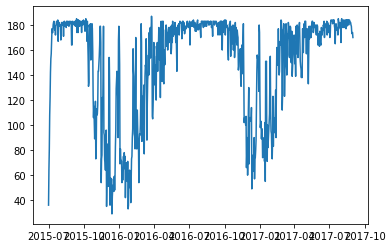

In [6]:
# add hotel stats?
plt.plot(h1_dbd.index, h1_dbd.RoomsSold)
plt.xticklabels=["2015", "2016", "2017"]

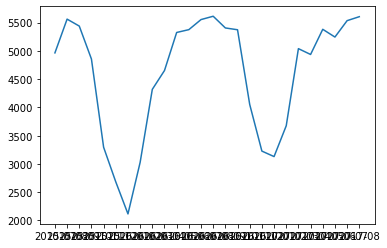

In [7]:
h1_dbd["year"] = pd.Series(h1_dbd.index).dt.year.astype(str)
h1_dbd["month"] = pd.Series(h1_dbd.index).dt.month
year_months = h1_dbd.index.map(lambda x: dt.datetime.strftime(x, format="%Y-%m"))
h1_dbd["year_month"] = year_months
by_month = h1_dbd[['year_month', 'RoomsSold']].groupby("year_month").agg("sum")
plt.xticklabels = [list(h1_dbd.year_month.unique())]
plt.xticklabelrotation = 90

plt.plot(by_month)


In [8]:
h1_stats.head()

,id,DOW,RoomsOTB,RevOTB,CxlForecast,TRN_RoomsOTB,TRN_RevOTB,TRN_CxlForecast,TRNP_RoomsOTB,GRP_RoomsOTB,CNT_RoomsOTB,StayDate,STLY_StayDate,DaysUntilArrival,Realized_Cxls,SellingPrice,TM30_RoomsOTB,TM30_RevOTB,TM30_TRN_RoomsOTB,TM30_TRN_RevOTB,TM15_RoomsOTB,TM15_RevOTB,TM15_TRN_RoomsOTB,TM15_TRN_RevOTB,TM05_RoomsOTB,TM05_RevOTB,TM05_TRN_RoomsOTB,TM05_TRN_RevOTB,AsOfDate,STLY_AsOfDate,RemSupply,ADR_OTB,TRN_ADR_OTB,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_NumCancels,LYA_TRN_RoomsSold,LYA_TRN_ADR,LYA_TRN_RoomRev,ACTUAL_RoomsSold,ACTUAL_ADR,ACTUAL_RoomRev,ACTUAL_TRN_RoomsSold,ACTUAL_TRN_ADR,ACTUAL_TRN_RoomRev,ACTUAL_NumCancels,ACTUAL_RoomsPickup,ACTUAL_ADR_Pickup,ACTUAL_RevPickup,ACTUAL_TRN_RoomsPickup,ACTUAL_TRN_ADR_Pickup,ACTUAL_TRN_RevPickup,MonthNum,DayOfWeek,Mon,Sat,Sun,Thu,Tue,Wed,WE,week_of_year,TM30_ADR_OTB,TM30_RoomsPickup,TM30_RevPickup,TM30_ADR_Pickup,TM30_TRN_ADR_OTB,TM30_TRN_RoomsPickup,TM30_TRN_RevPickup,TM30_TRN_ADR_Pickup,TM15_ADR_OTB,TM15_RoomsPickup,TM15_RevPickup,TM15_ADR_Pickup,TM15_TRN_ADR_OTB,TM15_TRN_RoomsPickup,TM15_TRN_RevPickup,TM15_TRN_ADR_Pickup,TM05_ADR_OTB,TM05_RoomsPickup,TM05_RevPickup,TM05_ADR_Pickup,TM05_TRN_ADR_OTB,TM05_TRN_RoomsPickup,TM05_TRN_RevPickup,TM05_TRN_ADR_Pickup,OTB_GapToLYA_RoomsSold,OTB_GapToLYA_ADR,OTB_GapToLYA_RoomRev,OTB_GapToLYA_NumCancels,OTB_GapToLYA_TRN_RoomsSold,OTB_GapToLYA_TRN_ADR,OTB_GapToLYA_TRN_RoomRev,id_STLY,AsOfDate_STLY,StayDate_STLY,DaysUntilArrival_STLY,RoomsOTB_STLY,ADR_OTB_STLY,RevOTB_STLY,ACTUAL_RoomsPickup_STLY,ACTUAL_ADR_Pickup_STLY,ACTUAL_RevPickup_STLY,CxlForecast_STLY,RemSupply_STLY,SellingPrice_STLY,Realized_Cxls_STLY,TRN_RoomsOTB_STLY,TRN_ADR_OTB_STLY,TRN_RevOTB_STLY,TRN_CxlForecast_STLY,ACTUAL_TRN_RoomsPickup_STLY,ACTUAL_TRN_ADR_Pickup_STLY,ACTUAL_TRN_RevPickup_STLY,TM30_RoomsPickup_STLY,TM30_ADR_Pickup_STLY,TM30_RevPickup_STLY,TM30_TRN_RoomsPickup_STLY,TM30_TRN_ADR_Pickup_STLY,TM30_TRN_RevPickup_STLY,TM15_RoomsPickup_STLY,TM15_ADR_Pickup_STLY,TM15_RevPickup_STLY,TM15_TRN_RoomsPickup_STLY,TM15_TRN_ADR_Pickup_STLY,TM15_TRN_RevPickup_STLY,TM05_RoomsPickup_STLY,TM05_ADR_Pickup_STLY,TM05_RevPickup_STLY,TM05_TRN_RoomsPickup_STLY,TM05_TRN_ADR_Pickup_STLY,TM05_TRN_RevPickup_STLY,Pace_RoomsOTB,Pace_ADR_OTB,Pace_RevOTB,Pace_CxlForecast,Pace_RemSupply,Pace_SellingPrice,Pace_TRN_RoomsOTB,Pace_TRN_ADR_OTB,Pace_TRN_RevOTB,Pace_TRN_CxlForecast,Pace_TM30_RoomsPickup,Pace_TM30_ADR_Pickup,Pace_TM30_RevPickup,Pace_TM30_TRN_RoomsPickup,Pace_TM30_TRN_ADR_Pickup,Pace_TM30_TRN_RevPickup,Pace_TM15_RoomsPickup,Pace_TM15_ADR_Pickup,Pace_TM15_RevPickup,Pace_TM15_TRN_RoomsPickup,Pace_TM15_TRN_ADR_Pickup,Pace_TM15_TRN_RevPickup,Pace_TM05_RoomsPickup,Pace_TM05_ADR_Pickup,Pace_TM05_RevPickup,Pace_TM05_TRN_RoomsPickup,Pace_TM05_TRN_ADR_Pickup,Pace_TM05_TRN_RevPickup
0,2016-07-31 - 2016-07-31,Sun,170.0,28570.36,25.0,137.0,23869.77,23.0,22.0,0.0,11.0,2016-07-31,2015-08-02,0.0,66.0,179.12,150.0,23981.92,122.0,20315.33,155.0,25254.01,127.0,21587.42,162.0,26749.13,128.0,21866.54,2016-07-31,2015-08-02,42.0,168.06,174.23,168.0,144.92,24346.11,68.0,129.0,153.96,19860.51,170.0,168.06,28570.36,137.0,174.23,23869.77,66.0,0.0,0.00,0.00,0.0,0.00,0.00,7,Sun,False,False,1,False,False,False,False,30.0,159.88,20.0,4588.44,8.18,166.52,15.0,3554.44,7.71,162.93,15.0,3316.35,5.13,169.98,10.0,2282.35,4.25,165.12,8.0,1821.23,2.94,170.83,9.0,2003.23,3.40,-2.0,-23.14,-4224.25,2.0,-8.0,-20.27,-4009.26,2015-08-02 - 2015-08-02,2015-08-02,2015-08-02,0,168.0,144.92,24346.11,0.0,0.00,0.0,22.0,41.0,153.37,68.0,129.0,153.96,19860.51,21.0,0.0,0.00,0.0,7.0,4.16,1683.25,10.0,4.81,2111.23,7.0,2.54,1422.56,9.0,2.99,1743.54,6.0,1.37,1090.87,6.0,1.36,1090.87,2.0,23.14,4224.25,3.0,1.0,25.75,8.0,20.27,4009.26,2.0,13.0,4.02,2905.19,5.0,2.90,1443.21,8.0,2.59,1893.79,1.0,1.26,538.81,2.0,1.57,730.36,3.0,2.04,912.36
1,2016-07-31 - 2016-08-01,Mon,178.0,29525.52,31.0,148.0,25429.03,30.0,20.0,0.0,10.0,2016-08-01,2015-08-03,1.0,70.0,176.01,175.0,28404.00,145.0,24307.51,175.0,28536.80,145.0,24440.31,171.0,27933.34,141.0,23836.85,2016-07-3

In [9]:
[c for c in h1_stats.columns]

['id',
 'DOW',
 'RoomsOTB',
 'RevOTB',
 'CxlForecast',
 'TRN_RoomsOTB',
 'TRN_RevOTB',
 'TRN_CxlForecast',
 'TRNP_RoomsOTB',
 'GRP_RoomsOTB',
 'CNT_RoomsOTB',
 'StayDate',
 'STLY_StayDate',
 'DaysUntilArrival',
 'Realized_Cxls',
 'SellingPrice',
 'TM30_RoomsOTB',
 'TM30_RevOTB',
 'TM30_TRN_RoomsOTB',
 'TM30_TRN_RevOTB',
 'TM15_RoomsOTB',
 'TM15_RevOTB',
 'TM15_TRN_RoomsOTB',
 'TM15_TRN_RevOTB',
 'TM05_RoomsOTB',
 'TM05_RevOTB',
 'TM05_TRN_RoomsOTB',
 'TM05_TRN_RevOTB',
 'AsOfDate',
 'STLY_AsOfDate',
 'RemSupply',
 'ADR_OTB',
 'TRN_ADR_OTB',
 'LYA_RoomsSold',
 'LYA_ADR',
 'LYA_RoomRev',
 'LYA_NumCancels',
 'LYA_TRN_RoomsSold',
 'LYA_TRN_ADR',
 'LYA_TRN_RoomRev',
 'ACTUAL_RoomsSold',
 'ACTUAL_ADR',
 'ACTUAL_RoomRev',
 'ACTUAL_TRN_RoomsSold',
 'ACTUAL_TRN_ADR',
 'ACTUAL_TRN_RoomRev',
 'ACTUAL_NumCancels',
 'ACTUAL_RoomsPickup',
 'ACTUAL_ADR_Pickup',
 'ACTUAL_RevPickup',
 'ACTUAL_TRN_RoomsPickup',
 'ACTUAL_TRN_ADR_Pickup',
 'ACTUAL_TRN_RevPickup',
 'MonthNum',
 'DayOfWeek',
 'Mon',
 'Sat',

In [10]:
%%time
h2_stats = prep_demand_features(2)

CPU times: user 51.7 s, sys: 199 ms, total: 51.9 s
Wall time: 54.6 s


In [11]:
a = 9
f"{a}-1"

'9-1'

In [12]:
h1_stats.head(10)

,id,DOW,RoomsOTB,RevOTB,CxlForecast,TRN_RoomsOTB,TRN_RevOTB,TRN_CxlForecast,TRNP_RoomsOTB,GRP_RoomsOTB,CNT_RoomsOTB,StayDate,STLY_StayDate,DaysUntilArrival,Realized_Cxls,SellingPrice,TM30_RoomsOTB,TM30_RevOTB,TM30_TRN_RoomsOTB,TM30_TRN_RevOTB,TM15_RoomsOTB,TM15_RevOTB,TM15_TRN_RoomsOTB,TM15_TRN_RevOTB,TM05_RoomsOTB,TM05_RevOTB,TM05_TRN_RoomsOTB,TM05_TRN_RevOTB,AsOfDate,STLY_AsOfDate,RemSupply,ADR_OTB,TRN_ADR_OTB,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_NumCancels,LYA_TRN_RoomsSold,LYA_TRN_ADR,LYA_TRN_RoomRev,ACTUAL_RoomsSold,ACTUAL_ADR,ACTUAL_RoomRev,ACTUAL_TRN_RoomsSold,ACTUAL_TRN_ADR,ACTUAL_TRN_RoomRev,ACTUAL_NumCancels,ACTUAL_RoomsPickup,ACTUAL_ADR_Pickup,ACTUAL_RevPickup,ACTUAL_TRN_RoomsPickup,ACTUAL_TRN_ADR_Pickup,ACTUAL_TRN_RevPickup,MonthNum,DayOfWeek,Mon,Sat,Sun,Thu,Tue,Wed,WE,week_of_year,TM30_ADR_OTB,TM30_RoomsPickup,TM30_RevPickup,TM30_ADR_Pickup,TM30_TRN_ADR_OTB,TM30_TRN_RoomsPickup,TM30_TRN_RevPickup,TM30_TRN_ADR_Pickup,TM15_ADR_OTB,TM15_RoomsPickup,TM15_RevPickup,TM15_ADR_Pickup,TM15_TRN_ADR_OTB,TM15_TRN_RoomsPickup,TM15_TRN_RevPickup,TM15_TRN_ADR_Pickup,TM05_ADR_OTB,TM05_RoomsPickup,TM05_RevPickup,TM05_ADR_Pickup,TM05_TRN_ADR_OTB,TM05_TRN_RoomsPickup,TM05_TRN_RevPickup,TM05_TRN_ADR_Pickup,OTB_GapToLYA_RoomsSold,OTB_GapToLYA_ADR,OTB_GapToLYA_RoomRev,OTB_GapToLYA_NumCancels,OTB_GapToLYA_TRN_RoomsSold,OTB_GapToLYA_TRN_ADR,OTB_GapToLYA_TRN_RoomRev,id_STLY,AsOfDate_STLY,StayDate_STLY,DaysUntilArrival_STLY,RoomsOTB_STLY,ADR_OTB_STLY,RevOTB_STLY,ACTUAL_RoomsPickup_STLY,ACTUAL_ADR_Pickup_STLY,ACTUAL_RevPickup_STLY,CxlForecast_STLY,RemSupply_STLY,SellingPrice_STLY,Realized_Cxls_STLY,TRN_RoomsOTB_STLY,TRN_ADR_OTB_STLY,TRN_RevOTB_STLY,TRN_CxlForecast_STLY,ACTUAL_TRN_RoomsPickup_STLY,ACTUAL_TRN_ADR_Pickup_STLY,ACTUAL_TRN_RevPickup_STLY,TM30_RoomsPickup_STLY,TM30_ADR_Pickup_STLY,TM30_RevPickup_STLY,TM30_TRN_RoomsPickup_STLY,TM30_TRN_ADR_Pickup_STLY,TM30_TRN_RevPickup_STLY,TM15_RoomsPickup_STLY,TM15_ADR_Pickup_STLY,TM15_RevPickup_STLY,TM15_TRN_RoomsPickup_STLY,TM15_TRN_ADR_Pickup_STLY,TM15_TRN_RevPickup_STLY,TM05_RoomsPickup_STLY,TM05_ADR_Pickup_STLY,TM05_RevPickup_STLY,TM05_TRN_RoomsPickup_STLY,TM05_TRN_ADR_Pickup_STLY,TM05_TRN_RevPickup_STLY,Pace_RoomsOTB,Pace_ADR_OTB,Pace_RevOTB,Pace_CxlForecast,Pace_RemSupply,Pace_SellingPrice,Pace_TRN_RoomsOTB,Pace_TRN_ADR_OTB,Pace_TRN_RevOTB,Pace_TRN_CxlForecast,Pace_TM30_RoomsPickup,Pace_TM30_ADR_Pickup,Pace_TM30_RevPickup,Pace_TM30_TRN_RoomsPickup,Pace_TM30_TRN_ADR_Pickup,Pace_TM30_TRN_RevPickup,Pace_TM15_RoomsPickup,Pace_TM15_ADR_Pickup,Pace_TM15_RevPickup,Pace_TM15_TRN_RoomsPickup,Pace_TM15_TRN_ADR_Pickup,Pace_TM15_TRN_RevPickup,Pace_TM05_RoomsPickup,Pace_TM05_ADR_Pickup,Pace_TM05_RevPickup,Pace_TM05_TRN_RoomsPickup,Pace_TM05_TRN_ADR_Pickup,Pace_TM05_TRN_RevPickup
0,2016-07-31 - 2016-07-31,Sun,170.0,28570.36,25.0,137.0,23869.77,23.0,22.0,0.0,11.0,2016-07-31,2015-08-02,0.0,66.0,179.12,150.0,23981.92,122.0,20315.33,155.0,25254.01,127.0,21587.42,162.0,26749.13,128.0,21866.54,2016-07-31,2015-08-02,42.0,168.06,174.23,168.0,144.92,24346.11,68.0,129.0,153.96,19860.51,170.0,168.06,28570.36,137.0,174.23,23869.77,66.0,0.0,0.00,0.00,0.0,0.00,0.00,7,Sun,False,False,1,False,False,False,False,30.0,159.88,20.0,4588.44,8.18,166.52,15.0,3554.44,7.71,162.93,15.0,3316.35,5.13,169.98,10.0,2282.35,4.25,165.12,8.0,1821.23,2.94,170.83,9.0,2003.23,3.40,-2.0,-23.14,-4224.25,2.0,-8.0,-20.27,-4009.26,2015-08-02 - 2015-08-02,2015-08-02,2015-08-02,0,168.0,144.92,24346.11,0.0,0.00,0.00,22.0,41.0,153.37,68.0,129.0,153.96,19860.51,21.0,0.0,0.00,0.00,7.0,4.16,1683.25,10.0,4.81,2111.23,7.0,2.54,1422.56,9.0,2.99,1743.54,6.0,1.37,1090.87,6.0,1.36,1090.87,2.0,23.14,4224.25,3.0,1.0,25.75,8.0,20.27,4009.26,2.0,13.0,4.02,2905.19,5.0,2.90,1443.21,8.0,2.59,1893.79,1.0,1.26,538.81,2.0,1.57,730.36,3.0,2.04,912.36
1,2016-07-31 - 2016-08-01,Mon,178.0,29525.52,31.0,148.0,25429.03,30.0,20.0,0.0,10.0,2016-08-01,2015-08-03,1.0,70.0,176.01,175.0,28404.00,145.0,24307.51,175.0,28536.80,145.0,24440.31,171.0,27933.34,141.0,23836.85,2016-07

In [13]:
h1_stats.to_csv("../data/h1_stats.csv")
h1_stats.to_pickle("../data/h1_stats.pick")
h2_stats.to_csv("../data/h2_stats.csv")
h2_stats.to_pickle("../data/h2_stats.pick")